# 목표 : 무게에 따른 길이를 예측해주는 모델
- 데이터 : fish
- 피처 : 무게
- 라벨 : 길이
- 학습방법 : 지도학습 + 예측 => KNN기반의  회귀
- 학습/테스트 7:3으로

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import numpy as np

In [60]:
data_file = "../data/fish.csv"
perchDF = pd.read_csv(data_file, usecols=[0, 1, 2]) 

perchDF

,Species,Weight,Length
0,Bream,242.0,25.4
1,Bream,290.0,26.3
2,Bream,340.0,26.5
3,Bream,363.0,29.0
4,Bream,430.0,29.0
...,...,...,...
154,Smelt,12.2,12.2
155,Smelt,13.4,12.4
156,Smelt,12.2,13.0
157,Smelt,19.7,14.3


In [61]:
from sklearn.model_selection import train_test_split

featureDF = perchDF[["Weight"]]
targetSR = perchDF["Length"]

In [95]:
X_train, X_test, Y_train, Y_test = train_test_split(featureDF, targetSR, test_size=0.3, random_state=10)

In [96]:
# 모델 인스턴스 생성 
from sklearn.neighbors import KNeighborsRegressor

In [97]:
# 최상의 K찾기
# 모델 성능 좌우하는 매개변수 : 하이퍼파라미터
# KNN의 하이퍼파라미터 : n_neighbors -> 1 ~ 전체 데이터 수
max_k = X_train.shape[0]
test_scoreList = []
train_scoreList = []
for k in range(1,max_k+1):
    
    model =  KNeighborsRegressor(n_neighbors=k)
    model.fit(X_train, Y_train)
    
    test_scoreList.append(model.score(X_train, Y_train))
    train_scoreList.append(model.score(X_test, Y_test))

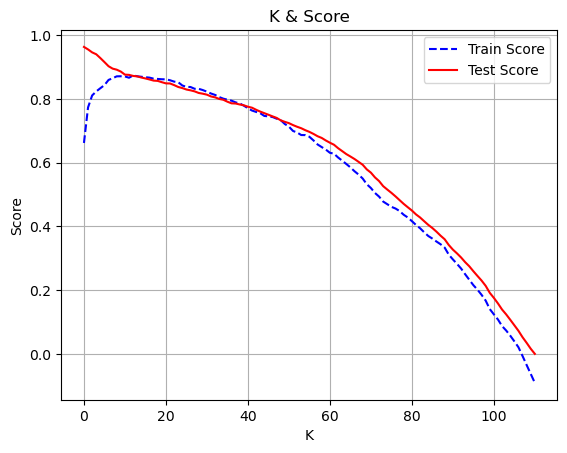

In [98]:
# K 갯수에  따른 학습용/테스트용 점수 시각화
plt.plot(train_scoreList, "b--", label = "Train Score")
plt.plot(test_scoreList, "r-", label = "Test Score")
plt.title("K & Score")
plt.xlabel("K")
plt.ylabel("Score")
plt.legend()
plt.grid()
plt.show()

In [99]:
model = KNeighborsRegressor(n_neighbors=10)

In [100]:
model.fit(X_train, Y_train)

KNeighborsRegressor(n_neighbors=10)

In [101]:
model.n_features_in_

1

In [102]:
# 학습 후 속성 확인
# print(f"피처에 할당되는 가중치 계수 : {model.coef_}") # 계수
# print(f"수식에 사용되는 절편 계수 : {model.intercept_}") # 절편 

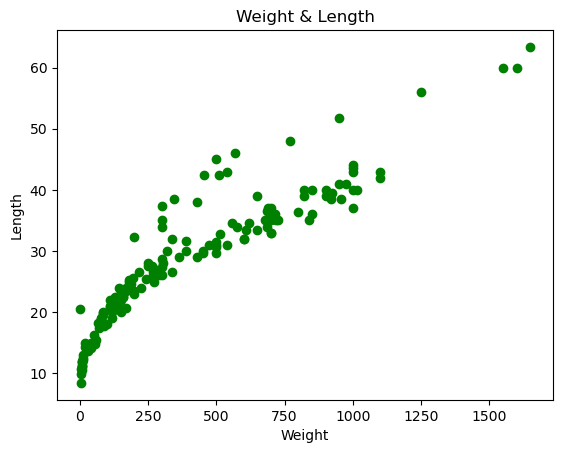

In [103]:
# 무게와 길이에 대한 시각화 
plt.plot(perchDF.Weight, perchDF.Length, "go")
plt.xlabel("Weight")
plt.ylabel("Length")
plt.title("Weight & Length")
# x = np.arange(0, 1000)     
# y = x*model.coef_ + model.intercept_          
# plt.plot(x, y)
plt.show()

## 테스트

In [104]:
# 결정계수 R2 즉, 얼마나 정답에 가깝게 근사하게 결과를 예측했는지를 나타내는 계수값 
# 범위 : 0.0 ~ 1.0 
# 1.0에 가까울수록 잘 만들어진 모델(적합한 수식)
train_score = model.score(X_train, Y_train)
test_score = model.score(X_test, Y_test)

In [105]:
print(f"train_score : {train_score}, test_score : {test_score}")

train_score : 0.8859108285111817, test_score : 0.8712592386983775


In [106]:
y_pre = model.predict(X_test)
y_pre = np.round(y_pre, 1)
y_pre

array([14.6, 21.5, 22.5, 35.4, 30.3, 23.2, 24.5, 32.5, 35.4, 28.2, 24.5,
       19.2, 21.5, 36.2, 19.2, 11.8, 25.5, 29. , 23.2, 23.4, 35. , 22. ,
       12.2, 30.3, 35.8, 22.2, 21. , 28.2, 32.5, 12.4, 21.5, 28.2, 41. ,
       22.5, 22. , 31.1, 37.1, 33.5, 28.2, 12.4, 12.4, 41. , 38.6, 41. ,
       27.5, 29. , 30.3, 20.8])

In [107]:
# 오차계산 => 예측값 - 정답
errorSR = y_pre - Y_test
errorSR

35      0.5
85      0.2
47      0.0
24      0.4
129    -3.7
95     -0.3
128    -7.8
10      1.5
58      4.4
104     0.7
69      1.5
63      1.5
39      1.5
20      2.2
38     -0.6
151     0.0
101    -1.0
1       2.7
67      2.5
99     -1.6
19      1.5
97     -2.0
157    -2.1
102     3.0
21      1.8
43      0.2
83      0.0
56      1.7
134   -10.0
147     1.8
87     -0.5
70      3.2
124    -2.0
49     -0.9
68      0.5
2       4.6
59      0.7
137   -11.5
55      2.2
152     0.6
72      4.0
127    -3.0
118    -0.4
60      1.0
103     0.0
52      3.0
130    -4.7
82     -0.2
Name: Length, dtype: float64

In [108]:
# 맞는 거 몇개 인지 보자요 -> 분류가 아니라 정확하게 맞을 필요 x 
errorSR[y_pre - Y_test == 0.0].count()

4

## 성능 평가

In [109]:
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score # 모델을 만든 후 성능 평가를 위한 기능 

In [110]:
# 결정 계수 값 1일수록 good
r2_score(Y_test, y_pre)

0.8709939346788143

In [111]:
# 평균제곱 오차
mean_absolute_error(Y_test, y_pre)

2.11875

- 제대로 만들어진 모델인지 확인하는 과정
> 훈련용 데이터에 대한 점수
> 테스트용 데이터에 대한 점수
> 훈련점수와 테스트점수 비교
> - 훈련점수 >> 테스트 점수 : 과대 적합
> - 훈련점수 $ \cong $ 테스트 점수 : 최적 적합
> - 훈련점수 ▼, 테스트 점수 ▼ : 과소 적합